In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import libsql_experimental as libsql
import os
from dotenv import load_dotenv


In [ ]:
load_dotenv()
url = os.getenv("TURSO_DATABASE_URL")
auth_token = os.getenv("TURSO_AUTH_TOKEN")
conn = libsql.connect("proyectomacro.db", sync_url=url, auth_token=auth_token)
cursor = conn.cursor()
conn.sync()

2025-03-22T15:08:23.400826Z  INFO libsql::replication::remote_client: Attempting to perform handshake with primary.
2025-03-22T15:08:23.830399Z  WARN libsql::replication::remote_client: Frames prefetching failed because of new session token returned by handshake


In [ ]:
df=pd.read_sql_query('select * from tasa_crecimiento_pib',conn)
df.set_index("Año", inplace=True)  # Convertir Año en índice de tiempo
df

/tmp/ipykernel_26039/1347478217.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query('select * from tasa_crecimiento_pib',conn)


,Crecimiento
Año,
1951,7.28
1952,3.81
1953,-9.89
1954,2.27
1955,4.54
...,...
2020,-8.74
2021,6.11
2022,3.74


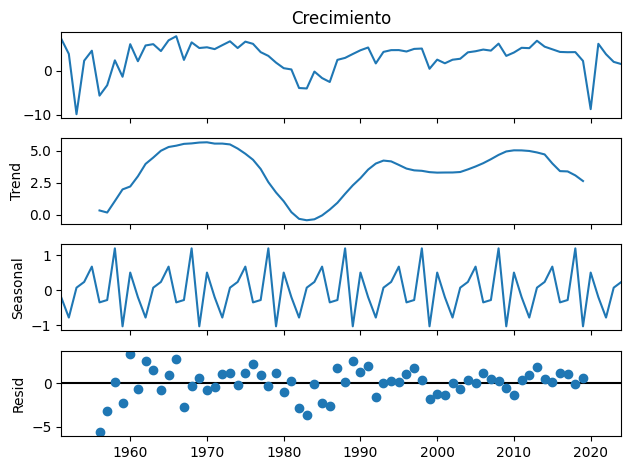

In [ ]:
# Descomposición de la serie de tiempo
descomposicion = sm.tsa.seasonal_decompose(df["Crecimiento"], model="additive", period=10)
descomposicion.plot()
plt.show()


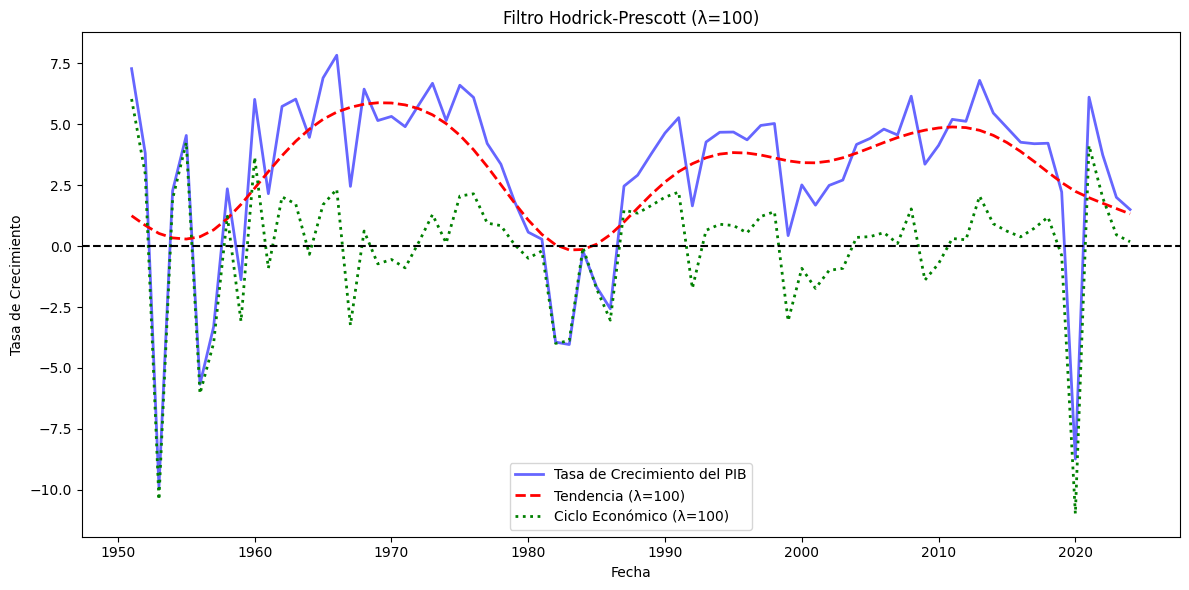

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

# Aplicar el filtro HP con lambda=100
ciclo_100, tendencia_100 = hpfilter(df["Crecimiento"], lamb=100)

# Configuración del estilo profesional
plt.figure(figsize=(12,6))

# Graficar la serie original, la tendencia y el ciclo
plt.plot(df.index, df["Crecimiento"], label="Tasa de Crecimiento del PIB", color='blue', alpha=0.6, linewidth=2)
plt.plot(df.index, tendencia_100, label="Tendencia (λ=100)", color='red', linestyle="--", linewidth=2)
plt.plot(df.index, ciclo_100, label="Ciclo Económico (λ=100)", color='green', linestyle=":", linewidth=2)
plt.axhline(0, color="black", linestyle="--", linewidth=1.5)

# Añadir título y etiquetas
plt.title("Filtro Hodrick-Prescott (λ=100)")
plt.xlabel("Fecha")
plt.ylabel("Tasa de Crecimiento")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


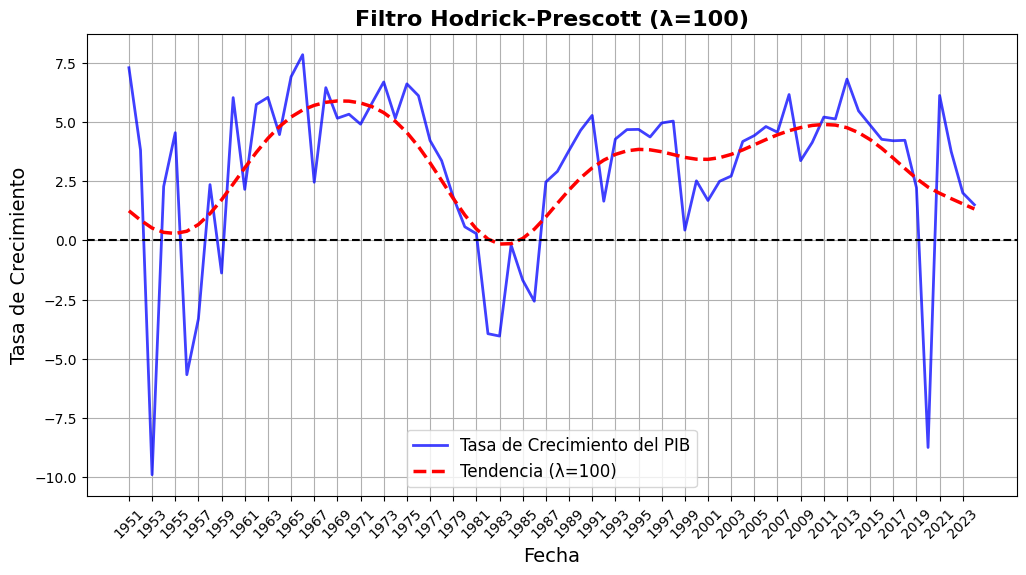

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

# Aplicar el filtro HP con lambda=100
ciclo_100, tendencia_100 = hpfilter(df["Crecimiento"], lamb=100)

# Configurar estilo vistoso
plt.figure(figsize=(12,6))

# Graficar la serie original, la tendencia y el ciclo
plt.plot(df.index, df["Crecimiento"], label="Tasa de Crecimiento del PIB", color='blue', alpha=0.75, linewidth=2)
plt.plot(df.index, tendencia_100, label="Tendencia (λ=100)", color='red', linestyle="--", linewidth=2.5)
plt.axhline(0, color="black", linestyle="--", linewidth=1.5)

# Títulos y etiquetas con formato
plt.title("Filtro Hodrick-Prescott (λ=100)", fontsize=16, fontweight='bold')
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Tasa de Crecimiento", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.xticks(df.index[::2], rotation=45)
plt.grid()
plt.show()


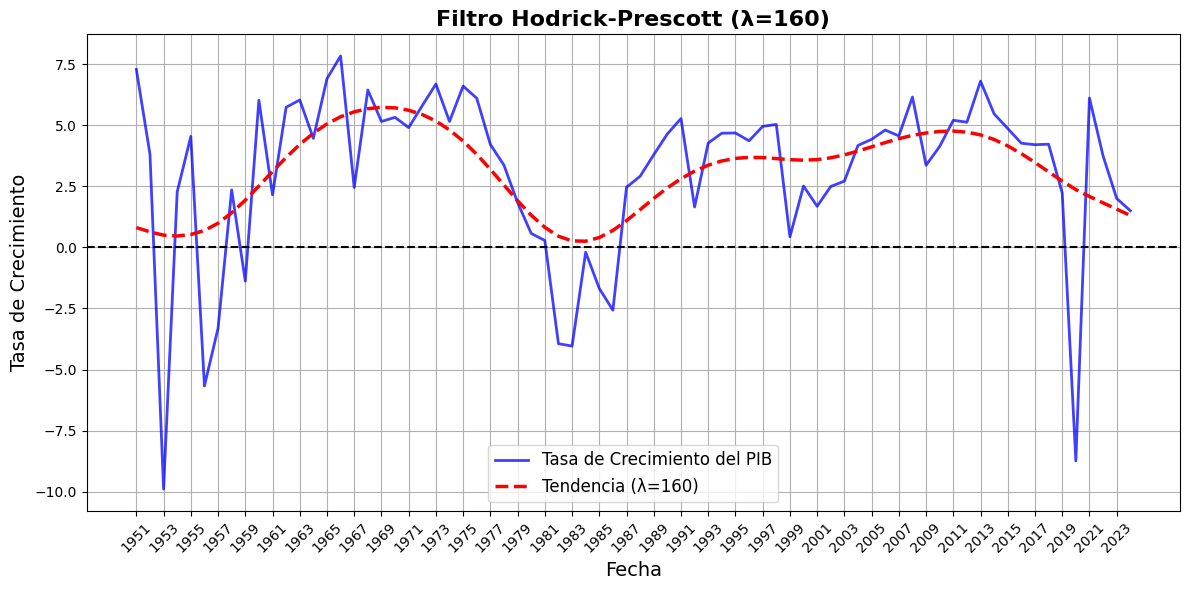

In [ ]:

# Aplicar el filtro HP con lambda=1600
ciclo_1600, tendencia_1600 = hpfilter(df["Crecimiento"], lamb=160)

# Configurar estilo vistoso
plt.figure(figsize=(12,6))

# Graficar la serie original, la tendencia y el ciclo
plt.plot(df.index, df["Crecimiento"], label="Tasa de Crecimiento del PIB", color='blue', alpha=0.75, linewidth=2)
plt.plot(df.index, tendencia_1600, label="Tendencia (λ=160)", color='red', linestyle="--", linewidth=2.5)
plt.axhline(0, color="black", linestyle="--", linewidth=1.5)

# Títulos y etiquetas con formato
plt.title("Filtro Hodrick-Prescott (λ=160)", fontsize=16, fontweight='bold')
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Tasa de Crecimiento", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.xticks(df.index[::2], rotation=45)
plt.tight_layout()
plt.grid()
plt.show()


In [ ]:
import pandas as pd

# Datos de 2016 a 2023 (convertidos de notación española a float)
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

zinc       = [0.93, 1.30, 1.33, 1.16, 1.02, 1.35, 1.59, 1.35]
estano     = [7.38, 7.99, 9.14, 9.13, 8.50, 7.72, 14.58, 14.58]
oro        = [1245.28, 1252.07, 1269.12, 1382.60, 1754.51, 1803.74, 1800.51, 1803.74]
plata      = [17.02, 17.04, 15.71, 16.09, 20.18, 25.29, 21.72, 25.29]
antimonio  = [6335.41, 8175.86, 8201.28, 6682.08, 5763.39, 10661.46, 12918.33, 10661.46]
plomo      = [0.84, 1.04, 1.02, 0.91, 0.83, 0.99, 0.98, 0.99]
wolfram    = [105.27, 134.90, 164.32, 129.47, 123.46, 159.49, 173.86, 159.49]
cobre      = [2.19, 2.77, 2.96, 2.72, 2.77, 4.19, 4.02, 4.19]
bismuto    = [4.29, 4.75, 4.40, 3.06, 2.61, 3.58, 3.77, 3.58]
cadmio     = [0.57, 0.74, 1.24, 1.17, 1.00, 1.11, 1.46, 1.11]
hierro     = [58.22, 71.45, 69.95, 92.60, 105.64, 92.60, 120.79, 162.56]
manganeso  = [4.27, 6.02, 7.23, 5.71, 4.69, 5.03, 6.09, 5.03]

# Crear DataFrame con los datos
data = {
    "Año": years,
    "Zinc": zinc,
    "Estaño": estano,
    "Oro": oro,
    "Plata": plata,
    "Antimonio": antimonio,
    "Plomo": plomo,
    "Wolfram": wolfram,
    "Cobre": cobre,
    "Bismuto": bismuto,
    "Cadmio": cadmio,
    "Hierro": hierro,
    "Manganeso": manganeso
}

df_minerales = pd.DataFrame(data)
df_minerales

,Año,Zinc,Estaño,Oro,Plata,Antimonio,Plomo,Wolfram,Cobre,Bismuto,Cadmio,Hierro,Manganeso
0,2016,0.93,7.38,1245.28,17.02,6335.41,0.84,105.27,2.19,4.29,0.57,58.22,4.27
1,2017,1.30,7.99,1252.07,17.04,8175.86,1.04,134.90,2.77,4.75,0.74,71.45,6.02
2,2018,1.33,9.14,1269.12,15.71,8201.28,1.02,164.32,2.96,4.40,1.24,69.95,7.23
3,2019,1.16,9.13,1382.60,16.09,6682.08,0.91,129.47,2.72,3.06,1.17,92.60,5.71
4,2020,1.02,8.50,1754.51,20.18,5763.39,0.83,123.46,2.77,2.61,1.00,105.64,4.69
5,2021,1.35,7.72,1803.74,25.29,10661.46,0.99,159.49,4.19,3.58,1.11,92.60,5.03
6,2022,1.59,14.58,1800.51,21.72,12918.33,0.98,173.86,4.02,3.77,1.46,120.79,6.09
7,2023,1.35,14.58,1803.74,25.29,10661.46,0.99,159.49,4.19,3.58,1.11,162.56,5.03
